In [1]:
# 서포트 벡터 머신
# 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
# 클래스 사이의 경계에 위치한 데이터 포인트를 서포터 벡터리고 함
# 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
# 각 서포트 벡터 사이의 마진(거리)이 가장 큰 방향으로 학습
# 서포트 벡터 까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행
# 서포터 벡터 머신은 차원을 늘려서 공간상에 맵핑후 나누는 것

In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
# svm 모듈에는 분류를 위한 SVC, 회귀를 위한 SVR 대표적인 두가지 클래스를 갖고 있음
from sklearn.svm import SVC, SVR
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE # 시각화에 도움을 준다고 함.

In [4]:
# SVM을 이용한 회귀 모델과 분류모델  

In [5]:
# SVR
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

# 기본적인 SVR을 돌렸을 때 굉장히 안 좋은 수치가 나옴을 볼 수 있음

훈련 데이터 점수 : 0.21772837063748762
평가 데이터 점수 : 0.13544178468518187


In [6]:
# SVC
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

# 분류용 데이터인 유방암 데이터를 가지고 돌려봄.

훈련 데이터 점수 : 0.9014084507042254
평가 데이터 점수 : 0.9230769230769231


In [7]:
# 커널 기법
# 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
# sklearn에서는 Linear, Polynomial, RBF 다양한 커널 기법을 지원

In [8]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print("linear_svr 훈련 데이터 점수 : {}".format(linear_svr.score(X_train, y_train)))
print("linear_svr 평가 데이터 점수 : {}".format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print("polynomial_svr 훈련 데이터 점수 : {}".format(polynomial_svr.score(X_train, y_train)))
print("polynomial_svr 평가 데이터 점수 : {}".format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print("rbf_svr훈련 데이터 점수 : {}".format(rbf_svr.score(X_train, y_train)))
print("rbf_svr평가 데이터 점수 : {}".format(rbf_svr.score(X_test, y_test)))

# 보스턴 주택 가격에 대한 support vector 커널에 대한 지표로는 Linear가 제일 좋더라

linear_svr 훈련 데이터 점수 : 0.7155066205123104
linear_svr 평가 데이터 점수 : 0.6380398541381507
polynomial_svr 훈련 데이터 점수 : 0.2024454261446289
polynomial_svr 평가 데이터 점수 : 0.133668450367462
rbf_svr훈련 데이터 점수 : 0.21772837063748762
rbf_svr평가 데이터 점수 : 0.13544178468518187


In [9]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print("linear_svc 훈련 데이터 점수 : {}".format(linear_svc.score(X_train, y_train)))
print("linear_svc 평가 데이터 점수 : {}".format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print("polynomial_svc 훈련 데이터 점수 : {}".format(polynomial_svc.score(X_train, y_train)))
print("polynomial_svc 평가 데이터 점수 : {}".format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print("rbf_svc훈련 데이터 점수 : {}".format(rbf_svc.score(X_train, y_train)))
print("rbf_svc평가 데이터 점수 : {}".format(rbf_svc.score(X_test, y_test)))

linear_svc 훈련 데이터 점수 : 0.960093896713615
linear_svc 평가 데이터 점수 : 0.986013986013986
polynomial_svc 훈련 데이터 점수 : 0.9014084507042254
polynomial_svc 평가 데이터 점수 : 0.9230769230769231
rbf_svc훈련 데이터 점수 : 0.9014084507042254
rbf_svc평가 데이터 점수 : 0.9230769230769231


In [10]:
# 매개변수 튜닝 
# SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
# 매개변수를 변경하면서 성능 변화를 관찰(하이퍼파라미터 변경)

In [11]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [12]:
# polynomial_svc 매개변수 튜닝
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print("kenel=poly, degree = {}, C = {}, gamma = {}".format(2, 0.1, 'auto'))
print("polynomial_svc 훈련 데이터 점수 : {}".format(polynomial_svc.score(X_train, y_train)))
print("polynomial_svc 평가 데이터 점수 : {}".format(polynomial_svc.score(X_test, y_test)))
# C = 정규화 매개 변수, 강도는 C에 반비례, l2 페널티(릿지)
# kernel = 기본값'rbf'
# degree int = , 기본값 = 3 , 다항 커널 함수 ( 'poly')의 차수입니다. 다른 모든 커널에서 무시
# 감마 = 'rbf', 'poly'및 'sigmoid'에 대한 커널 계수, 기본값 = scale

kenel=poly, degree = 2, C = 0.1, gamma = auto
polynomial_svc 훈련 데이터 점수 : 0.9835680751173709
polynomial_svc 평가 데이터 점수 : 0.993006993006993


In [13]:
# rbf_svc 매개변수 튜닝
rbf_svc = SVC(kernel = 'rbf', C = 2, gamma='scale')
rbf_svc.fit(X_train, y_train)

print("kenel = rbf, C = {}, gamma = {}".format(2,'scale'))
print("rbf_svc훈련 데이터 점수 : {}".format(rbf_svc.score(X_train, y_train)))
print("rbf_svc평가 데이터 점수 : {}".format(rbf_svc.score(X_test, y_test)))

kenel = rbf, C = 2, gamma = scale
rbf_svc훈련 데이터 점수 : 0.9154929577464789
rbf_svc평가 데이터 점수 : 0.9370629370629371


In [14]:
rbf_svc = SVC(C = 2)
rbf_svc.fit(X_train, y_train)

print("kenel=default(rbf), C = {}, gamma = {}".format( 2, 'default(scale)'))
print("rbf_svc훈련 데이터 점수 : {}".format(rbf_svc.score(X_train, y_train)))
print("rbf_svc평가 데이터 점수 : {}".format(rbf_svc.score(X_test, y_test)))

kenel=default(rbf), C = 2, gamma = default(scale)
rbf_svc훈련 데이터 점수 : 0.9154929577464789
rbf_svc평가 데이터 점수 : 0.9370629370629371


In [15]:
# 데이터 전처리
# SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
# 주로 모든 특성 값을 [0,1] 범위로 맞추는 방법을 사용
# sklearn의 StandardScaler 또는 MinMaxscaler 사용해 정규화

In [16]:
# 전처리 전 과정 
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [17]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [18]:
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.9014084507042254
평가 데이터 점수 : 0.9230769230769231


In [19]:
# 데이터 스케일링(주의할점은 꼬옥 X_train, X_test 값에서만 스케일링을 진행해줘야함, y_train, y_test는 레이블이기 때문)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [21]:
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))
# 전처리 후 점수가 개선 되었음을 확인할 수 있었음

훈련 데이터 점수 : 0.9835680751173709
평가 데이터 점수 : 0.986013986013986


In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [24]:
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.9812206572769953
평가 데이터 점수 : 0.986013986013986


In [25]:
############################### kernel linear SVR
# 보스턴 주택 가격

In [26]:
X, y = load_boston(return_X_y=True)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [30]:
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))
# 평가가 좋은 평은 아님

훈련 데이터 점수 : 0.7055756339696615
평가 데이터 점수 : 0.731043091835468


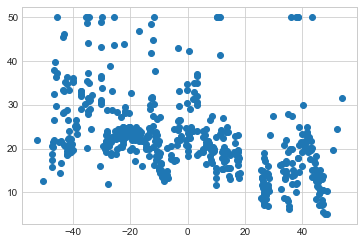

In [31]:
# 시각화(feature들이 여러개, tsne -> 저차원으로 변환)
# 서포터 벡터 머신은 차원을 늘려서 공간상에 맵핑후 나누는 것이지만 시각화로 보고자 한다면 저차원으로 바꿔 보아야함

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

# 전체 데이터에 대한 간단한 청사진

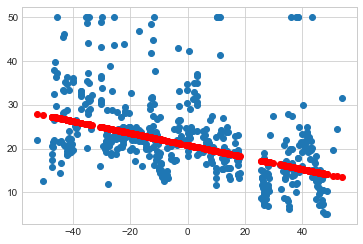

In [32]:
# 차원 축소한 전체 데이터에 대한 모델링 학습
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color= 'r');
# 값이 너무 퍼져있음을 인지할 수 있다.

In [33]:
# pipeline을 활용한 cross_validate(=교차 검증을 통해 메트릭을 평가하고 적합 / 점수 시간을 기록)
estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))
                          
cross_validate(
estimator = estimator,
X=X, y=y,
cv=5,
n_jobs = multiprocessing.cpu_count(),
verbose=True)
 # verbose=True 상세 수준                         

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    1.9s finished


{'fit_time': array([0.01495934, 0.01495957, 0.014961  , 0.01396298, 0.02094126]),
 'score_time': array([0.0019958 , 0.00199533, 0.00199485, 0.00199461, 0.00099659]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [34]:
# GriGridSearchCV를 활용해 적합한 모델 매개변수(파라미터) 찾기
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C' : [1.0, 0.1, 0.01],
             'model__epsilon' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [35]:
# 최적의 파라미터 추출
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

In [36]:
# kernel linear SVR
# 당뇨병 데이터 활용

In [37]:
X, y = load_diabetes(return_X_y=True)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [40]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [41]:
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))
# 보스턴 주택 가격 데이터 보다 좋지 못한 점수를 보여주고 있음

훈련 데이터 점수 : 0.5044649636179404
평가 데이터 점수 : 0.4958388971450517


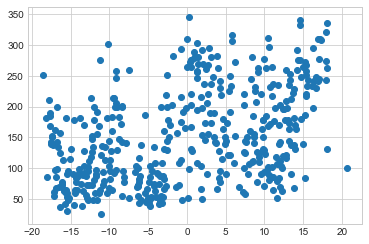

In [42]:
# 시각화(feature들이 여러개, tsne -> 저차원으로 변환)
# 서포터 벡터 머신은 차원을 늘려서 공간상에 맵핑후 나누는 것이지만 시각화로 보고자 한다면 저차원으로 바꿔 보아야함

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

# 전체 데이터에 대한 간단한 청사진

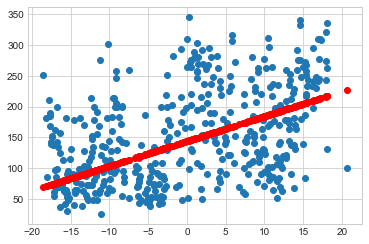

In [43]:
# 차원 축소한 전체 데이터에 대한 모델링 학습
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color= 'r');
# 값이 너무 퍼져있음을 인지할 수 있다.

In [44]:
# pipeline을 활용한 cross_validate(=교차 검증을 통해 메트릭을 평가하고 적합 / 점수 시간을 기록)
estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))
                          
cross_validate(
estimator = estimator,
X=X, y=y,
cv=5,
n_jobs = multiprocessing.cpu_count(),
verbose=True)
 # verbose=True 상세 수준                         

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00891662, 0.00792003, 0.00698137, 0.00698137, 0.00797892]),
 'score_time': array([0.00199556, 0.00099659, 0.00099659, 0.00199437, 0.00099778]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [45]:
# GriGridSearchCV를 활용해 적합한 모델 매개변수(파라미터) 찾기
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
             'model__C' : [1.0, 0.1, 0.01],
             'model__epsilon' : [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [46]:
# 최적의 파라미터 추출
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

In [47]:
# kernel = rbf SVR
# 보스턴 주택 가격

In [48]:
X, y = load_boston(return_X_y=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [52]:
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))
# 평가가 좋은 평은 아님

훈련 데이터 점수 : 0.6533299069229426
평가 데이터 점수 : 0.7002589633677283


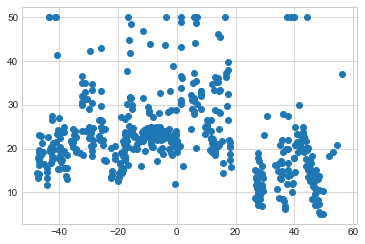

In [53]:
# 시각화(feature들이 여러개, tsne -> 저차원으로 변환)
# 서포터 벡터 머신은 차원을 늘려서 공간상에 맵핑후 나누는 것이지만 시각화로 보고자 한다면 저차원으로 바꿔 보아야함

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

# 전체 데이터에 대한 간단한 청사진

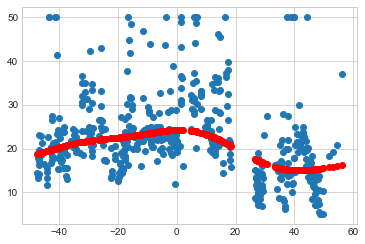

In [54]:
# 차원 축소한 전체 데이터에 대한 모델링 학습
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color= 'r');
# 값이 너무 퍼져있음을 인지할 수 있다.
# rbf에 의미에 따라 비선형으로 이뤄져있음을 볼 수 있음
# 훈련, 평가 점수는 보다 낫지만 선형에 비해서 데이터를 잘 반영했다고 볼 수 있음

In [55]:
# pipeline을 활용한 cross_validate(=교차 검증을 통해 메트릭을 평가하고 적합 / 점수 시간을 기록)
estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))
                          
cross_validate(
estimator = estimator,
X=X, y=y,
cv=5,
n_jobs = multiprocessing.cpu_count(),
verbose=True)
 # verbose=True 상세 수준                         

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01694632, 0.01195955, 0.01195955, 0.01097012, 0.01695347]),
 'score_time': array([0.00797892, 0.00498676, 0.00498676, 0.00498676, 0.00698304]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [56]:
# GriGridSearchCV를 활용해 적합한 모델 kernel 찾기
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel' : ['rbf', 'polynomial', 'sigmoid']}]  ## 커널값을 비교해보자

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.17631266        nan 0.14981591]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=12,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [57]:
# 최적의 kernel 추출
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [58]:
# GriGridSearchCV를 활용해 나온 rbf를 활용해 최적의 파라미터 찾기
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto']},
              {'model__C' : [1.0, 0.1, 0.01]},
              {'model__epsilon' : [1.0, 0.1, 0.01]}] 

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=12,
             param_grid=[{'model__gamma': ['scale', 'auto']},
                         {'model__C': [1.0, 0.1, 0.01]},
                         {'model__epsilon': [1.0, 0.1, 0.01]}],
             verbose=True)

In [59]:
# 최적의 파라미터 추출
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

In [60]:
# kernel = rbf SVR
# 당뇨병

In [61]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [64]:
print("훈련 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))
# 점수가 너무 안좋음

훈련 데이터 점수 : 0.184098494216708
평가 데이터 점수 : 0.09824045807497228


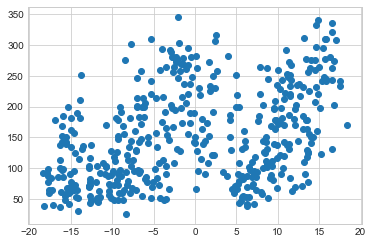

In [65]:
# 시각화(feature들이 여러개, tsne -> 저차원으로 변환)
# 서포터 벡터 머신은 차원을 늘려서 공간상에 맵핑후 나누는 것이지만 시각화로 보고자 한다면 저차원으로 바꿔 보아야함

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

# 전체 데이터에 대한 간단한 청사진

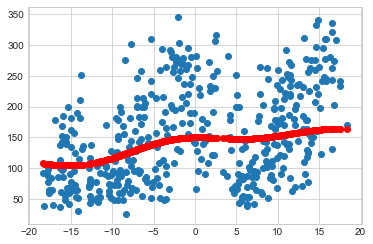

In [66]:
# 차원 축소한 전체 데이터에 대한 모델링 학습
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color= 'r');
# 값이 너무 퍼져있음을 인지할 수 있다.
# rbf에 의미에 따라 비선형으로 이뤄져있음을 볼 수 있음
# 훈련, 평가 점수는 보다 낫지만 선형에 비해서 데이터를 잘 반영했다고 볼 수 있음

In [67]:
# pipeline을 활용한 cross_validate(=교차 검증을 통해 메트릭을 평가하고 적합 / 점수 시간을 기록)
estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))
                          
cross_validate(
estimator = estimator,
X=X, y=y,
cv=5,
n_jobs = multiprocessing.cpu_count(),
verbose=True)
 # verbose=True 상세 수준                         

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00897574, 0.00897574, 0.00897574, 0.00897598, 0.00897598]),
 'score_time': array([0.00398946, 0.00398946, 0.0050261 , 0.00402808, 0.00402808]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [68]:
# GriGridSearchCV를 활용해 적합한 모델 kernel 찾기
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel' : ['rbf', 'polynomial', 'sigmoid']}]  ## 커널값을 비교해보자

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.14659936        nan 0.34913589]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=12,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [69]:
# 최적의 kernel 추출
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [70]:
# GriGridSearchCV를 활용해 나온 sigmoid 활용해 최적의 파라미터 찾기
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma' : ['scale', 'auto']},
              {'model__C' : [1.0, 0.1, 0.01]},
              {'model__epsilon' : [1.0, 0.1, 0.01]}] 

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=12,
             param_grid=[{'model__gamma': ['scale', 'auto']},
                         {'model__C': [1.0, 0.1, 0.01]},
                         {'model__epsilon': [1.0, 0.1, 0.01]}],
             verbose=True)

In [71]:
# 최적의 파라미터 추출
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='sigmoid'))])

In [72]:
# 최적의 커널과 파라미터를 활용해 fit 해보기

model = gs.best_estimator_

In [73]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='sigmoid'))])

In [74]:
print("훈련 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test,y_test)))

# 점수가 개선 되었음

훈련 데이터 점수 : 0.4023176969022665
평가 데이터 점수 : 0.2796329892408974


In [75]:
############################### linear SVC
# 유방암 데이터

In [76]:
X, y = load_breast_cancer(return_X_y=True)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
model = SVC(kernel='linear')

In [80]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [81]:
print('훈련 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.989010989010989
평가 데이터 점수 : 0.9736842105263158


In [82]:
def make_meshgrid(x,y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

In [83]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [84]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

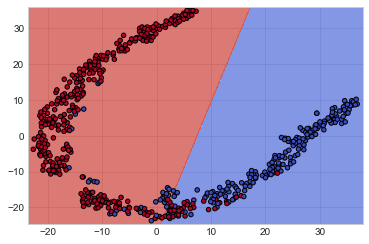

In [85]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [86]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))
                          
cross_validate(
estimator = estimator,
X=X, y=y,
cv=5,
n_jobs = multiprocessing.cpu_count(),
verbose=True)
 # verbose=True 상세 수준                         

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00598383, 0.0050168 , 0.00498629, 0.00598502, 0.00398707]),
 'score_time': array([0.00099874, 0.00096703, 0.        , 0.00099564, 0.00099874]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [87]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
               'model__C' : [1.0, 0.1, 0.01]}]  ## 커널값을 비교해보자

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [88]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [89]:
############################### linear SVC
# 붓꽃 데이터

In [90]:
X, y = load_iris(return_X_y=True)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [92]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
model = SVC(kernel='linear')

In [94]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [95]:
print('훈련 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.9833333333333333
평가 데이터 점수 : 0.9666666666666667


In [96]:
def make_meshgrid(x,y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy


In [97]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [98]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

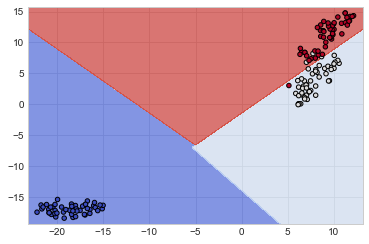

In [99]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [100]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))
                          
cross_validate(
estimator = estimator,
X=X, y=y,
cv=5,
n_jobs = multiprocessing.cpu_count(),
verbose=True)
 # verbose=True 상세 수준                         

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00192881, 0.00252748, 0.00252748, 0.0015285 , 0.00251341]),
 'score_time': array([0.0015285 , 0.        , 0.        , 0.00098491, 0.00102353]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [101]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
               'model__C' : [1.0, 0.1, 0.01]}]  ## 커널값을 비교해보자

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [102]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [103]:
############################### linear SVC
# 와인 데이터

In [104]:
X, y = load_wine(return_X_y=True)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
model = SVC(kernel='linear')

In [107]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [108]:
print('훈련 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

훈련 데이터 점수 : 1.0
평가 데이터 점수 : 0.9166666666666666


In [109]:
def make_meshgrid(x,y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

In [110]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [111]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

In [112]:
model.fit(X_comp, y)

SVC(kernel='linear')

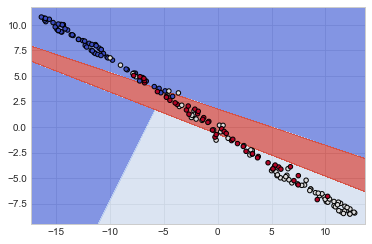

In [113]:
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [114]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))
                          
cross_validate(
estimator = estimator,
X=X, y=y,
cv=5,
n_jobs = multiprocessing.cpu_count(),
verbose=True)
 # verbose=True 상세 수준   

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00285459, 0.0015049 , 0.00099683, 0.00199366, 0.0025456 ]),
 'score_time': array([0.        , 0.        , 0.00099683, 0.00055194, 0.        ]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [115]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
               'model__C' : [1.0, 0.1, 0.01]}]  ## 커널값을 비교해보자

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [116]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [117]:
############################### kernel SVC
# 유방암

In [118]:
X, y = load_breast_cancer(return_X_y=True)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [120]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
model = SVC(kernel='rbf')

In [122]:
model.fit(X_train, y_train)

SVC()

In [123]:
print('훈련 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.9868131868131869
평가 데이터 점수 : 0.9824561403508771


In [124]:

def make_meshgrid(x,y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

In [125]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [126]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)

SVC()

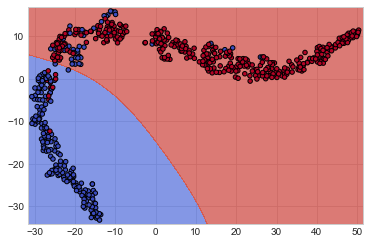

In [127]:
# rbf 이므로 비선형으로 나올것
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [128]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))
                          
cross_validate(
estimator = estimator,
X=X, y=y,
cv=5,
n_jobs = multiprocessing.cpu_count(),
verbose=True)
 # verbose=True 상세 수준

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00800896, 0.00601888, 0.00702071, 0.00502062, 0.00801206]),
 'score_time': array([0.00299001, 0.00399184, 0.00299001, 0.00299144, 0.00299358]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [129]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
               'model__C' : [1.0, 0.1, 0.01]}]  ## 커널값을 비교해보자

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [130]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [131]:
############################### kernel SVC
# 붓꽃

In [132]:
X, y = load_iris(return_X_y=True)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [134]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
model = SVC(kernel='rbf')

In [136]:
model.fit(X_train, y_train)

SVC()

In [137]:
print('훈련 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

훈련 데이터 점수 : 0.975
평가 데이터 점수 : 0.9333333333333333


In [138]:
def make_meshgrid(x,y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy


In [139]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [140]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

In [141]:
model.fit(X_comp, y)

SVC()

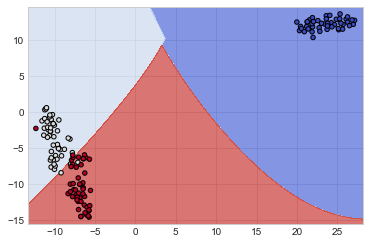

In [142]:
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [145]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))
                          
cross_validate(
estimator = estimator,
X=X, y=y,
cv=5,
n_jobs = multiprocessing.cpu_count(),
verbose=True)
 # verbose=True 상세 수준               

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00192499, 0.00096965, 0.00196815, 0.00154757, 0.00250912]),
 'score_time': array([0.00154757, 0.00154757, 0.00054908, 0.        , 0.        ]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [147]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
               'model__C' : [1.0, 0.1, 0.01]}]  ## 커널값을 비교해보자

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [149]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [150]:
############################### kernel SVC
# 와인

In [152]:
X, y = load_wine(return_X_y=True)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [154]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
model = SVC(kernel='rbf')

In [157]:
model.fit(X_train, y_train)

SVC()

In [158]:
print('훈련 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

훈련 데이터 점수 : 1.0
평가 데이터 점수 : 1.0


In [159]:
def make_meshgrid(x,y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

In [160]:

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [161]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

model.fit(X_comp, y)

SVC()

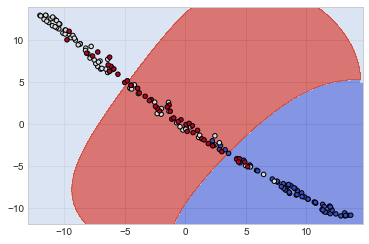

In [162]:
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');
# 저차원으로 보고 있기 때문에 잘 안나눠진 것 같지만 고차원에서 다루는 모델링이기 때문에 잘 나눠졌을 것이다.

In [169]:
estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))
                          
cross_validate(
estimator = estimator,
X=X, y=y,
cv=5,
n_jobs = multiprocessing.cpu_count(),
verbose=True)
 # verbose=True 상세 수준       

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00299168, 0.00299168, 0.0029912 , 0.0029912 , 0.00199318]),
 'score_time': array([0.00099683, 0.00199556, 0.00099874, 0.00099874, 0.00099874]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [170]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
               'model__C' : [1.0, 0.1, 0.01]}]  ## 커널값을 비교해보자

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv =5,
    verbose=True
)


gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [171]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])